In [25]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


## 1. Data Cleanup

In [11]:
train_base_df = pd.read_csv('train.csv')
test_base_df = pd.read_csv('test.csv')

In [12]:
train_base_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
test_base_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Train-Test Split
Since you don’t have labels for the test data, splitting the training data into a train-test set is a good idea. This will allow us to evaluate the models’ performance.

In [14]:
# Split the data into an 80/20 training/testing split
train_split_df, test_split_df = train_test_split(train_base_df, test_size=0.2, random_state=42)

In [63]:
print(train_split_df.shape)
print(test_split_df.shape)
test_split_df.info()
train_split_df.info()

(712, 12)
(179, 12)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 709 to 10
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  179 non-null    int64  
 1   Survived     179 non-null    int64  
 2   Pclass       179 non-null    int64  
 3   Name         179 non-null    object 
 4   Sex          179 non-null    object 
 5   Age          142 non-null    float64
 6   SibSp        179 non-null    int64  
 7   Parch        179 non-null    int64  
 8   Ticket       179 non-null    object 
 9   Fare         179 non-null    float64
 10  Cabin        45 non-null     object 
 11  Embarked     179 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 102
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null  

In [62]:
# make gender be a bool rather than string
train_split_df['Sex'] = train_split_df['Sex'].replace({'male': 0, 'female': 1})

In [65]:
train_split_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
331,332,0,1,0,45.5,0,0,28.5000
733,734,0,2,0,23.0,0,0,13.0000
382,383,0,3,0,32.0,0,0,7.9250
704,705,0,3,0,26.0,1,0,7.8542
813,814,0,3,1,6.0,4,2,31.2750


In [38]:
# missing values 
train_base_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Handling missing data
Handling missing data depends on the nature of the data and the specific requirements of your analysis. Here’s how you can approach the missing values in your dataset:

Age: There are 140 missing values. You could fill these missing values with the mean, median, or mode of the available Age data. This is a simple and common method to handle missing numerical data12.

Cabin: There are 553 missing values, which is a significant portion of your data. If this feature is not significant for your predictions, you might consider dropping this column. If you believe it could be a useful feature, you could fill the missing values with a new category (e.g., ‘Unknown’). Another approach could be to infer Cabin details from other related features if possible1.

Embarked: There are only 2 missing values. If Embarked is a categorical feature, you could fill the missing values with the mode (most frequent value) of the column. Alternatively, if these two missing values do not significantly impact your dataset size, you could drop these two rows13.

In [64]:
# drop irrelevant columns name, ticket, cabin, embarked

train_split_df = train_split_df.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)

#### Handing missing age data
Choosing between mean, median, or mode to fill missing values in the ‘Age’ column depends on the distribution of ‘Age’. If ‘Age’ is normally distributed, the mean could be a good choice. If it’s skewed, the median might be better. The mode is typically used for categorical data, but can be used for numerical data if there’s a value that clearly appears more frequently.

However, a more sophisticated approach could be to fill the missing ages based on other related features. For example, you could fill the missing ages with the average age of passengers that share the same 'Pclass’.

In [47]:
#remove null values 
age_plot_df = train_base_df.dropna(subset=['Age'])

print(train_base_df['Age'].isnull().sum())
print(age_plot_df['Age'].isnull().sum())
age_plot_df.head()

177
0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


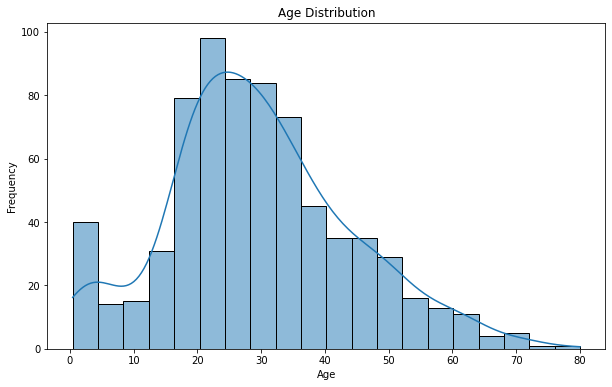

In [48]:
plt.figure(figsize=(10,6))
sns.histplot(data=age_plot_df, x='Age', kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

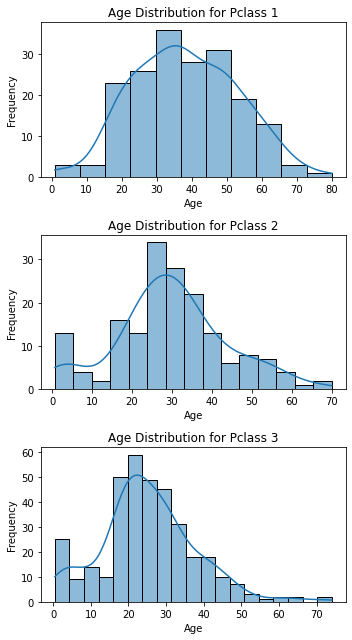

In [50]:
fig, axs = plt.subplots(3, figsize=(5,9))

pclasses = sorted(train_base_df['Pclass'].unique())
for i, pclass in enumerate(pclasses):
    sns.histplot(data=train_base_df[train_base_df['Pclass'] == pclass], x='Age', kde=True, ax=axs[i])
    axs[i].set_title(f'Age Distribution for Pclass {pclass}')
    axs[i].set_xlabel('Age')
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [52]:
# df.groupby('Pclass')['Age'].transform('median') calculates the median age for each ‘Pclass’.
# fillna replaces the null values in the ‘Age’ column with these median values.

train_split_df['Age'].fillna(train_split_df.groupby('Pclass')['Age'].transform('median'), inplace=True)

In [54]:
train_split_df.head()
print(train_split_df['Age'].isnull().sum())

0


## 3. EDA

PassengerId    0.019979
Survived       1.000000
Pclass        -0.321750
Sex            0.541750
Age           -0.038158
SibSp         -0.047602
Parch          0.078311
Fare           0.246641
Name: Survived, dtype: float64
             PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000  0.019979 -0.046175 -0.044774  0.030951 -0.069226   
Survived        0.019979  1.000000 -0.321750  0.541750 -0.038158 -0.047602   
Pclass         -0.046175 -0.321750  1.000000 -0.128672 -0.385855  0.086933   
Sex            -0.044774  0.541750 -0.128672  1.000000 -0.083445  0.104174   
Age             0.030951 -0.038158 -0.385855 -0.083445  1.000000 -0.250688   
SibSp          -0.069226 -0.047602  0.086933  0.104174 -0.250688  1.000000   
Parch          -0.000217  0.078311  0.012679  0.250724 -0.190104  0.440355   
Fare            0.025517  0.246641 -0.546794  0.171665  0.106697  0.153011   

                Parch      Fare  
PassengerId -0.000217  0.025517  
Surviv

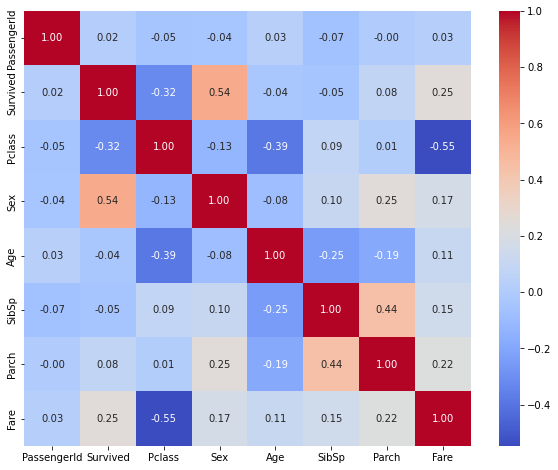

In [66]:
# The df.corr() function in pandas automatically excludes null values when calculating the correlation.
# So, you don’t need to remove null values before using this function.

correlation_with_survived = train_split_df.corr()['Survived']
print(correlation_with_survived)

correlation_matrix = train_split_df.corr()
print(correlation_matrix)

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()